# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     | Terezza Marianne González Jáuregui  |
| **Fecha**      | 3 de octubre de 2024  |
| **Expediente** | 734565  | 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [8]:
import pandas as pd

obj = pd.read_csv('Default.csv')
obj

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
...,...,...,...,...
9995,No,No,711.555020,52992.378910
9996,No,No,757.962918,19660.721770
9997,No,No,845.411989,58636.156980
9998,No,No,1569.009053,36669.112360


2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [11]:
obj.head() #Primeras 5 filas 

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [16]:
obj.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

El balance y income como columnas numéricas y default y student como columnas de categoría de sí y no.

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [29]:
obj["default"] = obj["default"].astype("category")
obj["student"] = obj["student"].astype("category")

Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

<Figure size 640x480 with 0 Axes>

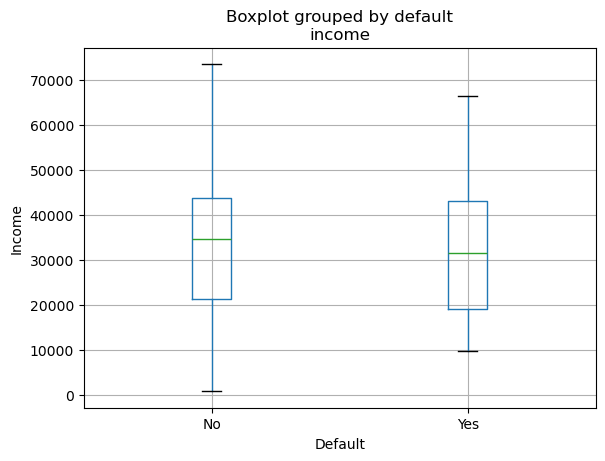

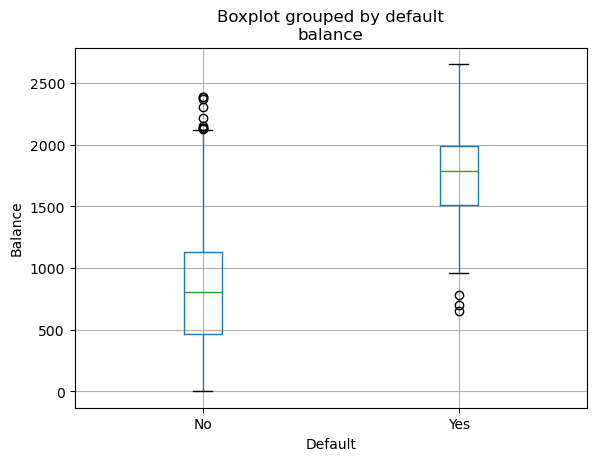

In [50]:
import matplotlib.pyplot as plt

plt.figure()
obj.boxplot(column="income", by="default")
plt.xlabel('Default')
plt.ylabel('Income')

obj.boxplot(column="balance", by="default")
plt.xlabel('Default')
plt.ylabel('Balance')

plt.show()

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

<Figure size 640x480 with 0 Axes>

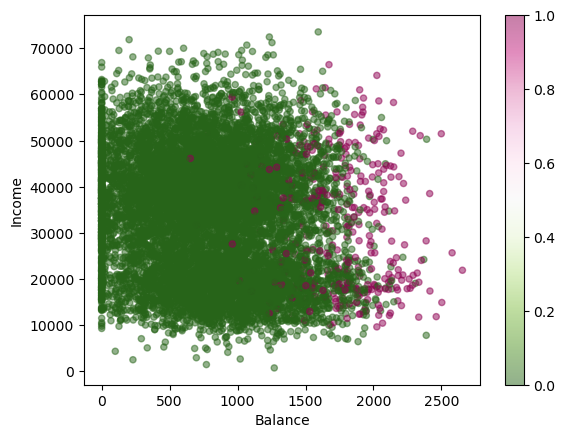

In [52]:
import matplotlib.pyplot as plt
plt.figure()
obj.plot.scatter(x="balance", y="income", c=obj["default"].cat.codes, colormap="PiYG_r", alpha=0.5)
plt.xlabel("Balance")
plt.ylabel("Income")
plt.show()

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [124]:
y = obj["default"] == "Yes"
x = obj["balance"]

y, x

(0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 9995    False
 9996    False
 9997    False
 9998    False
 9999    False
 Name: default, Length: 10000, dtype: bool,
 0        729.526495
 1        817.180407
 2       1073.549164
 3        529.250605
 4        785.655883
            ...     
 9995     711.555020
 9996     757.962918
 9997     845.411989
 9998    1569.009053
 9999     200.922183
 Name: balance, Length: 10000, dtype: float64)

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

KeyError: "None of [Index([ 729.5264952072861,        817.1804066,        1073.549164,\n              529.2506047,        785.6558829,        919.5885305,\n              825.5133305,        808.6675043,        1161.057854,\n                      0.0,\n       ...\n              372.3792385,        658.7995582, 1111.6473168583802,\n              938.8362414,        172.4129875,        711.5550205,\n              757.9629184,        845.4119892, 1569.0090533837197,\n       200.92218263479697],\n      dtype='float64', length=10000)] are in the [columns]"

<Figure size 1000x600 with 0 Axes>

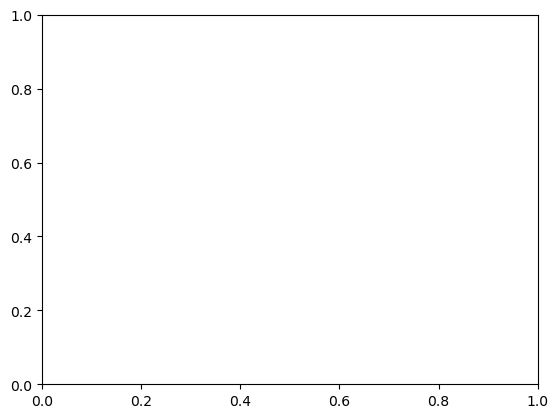

In [134]:
import matplotlib.pyplot as plt

x = obj["balance"]
y = (obj["default"] == "Yes")

plt.figure(figsize=(10, 6))
obj.plot.scatter(x, y, alpha=0.5)
plt.xlabel("Balance")
plt.ylabel("Default")
plt.show()

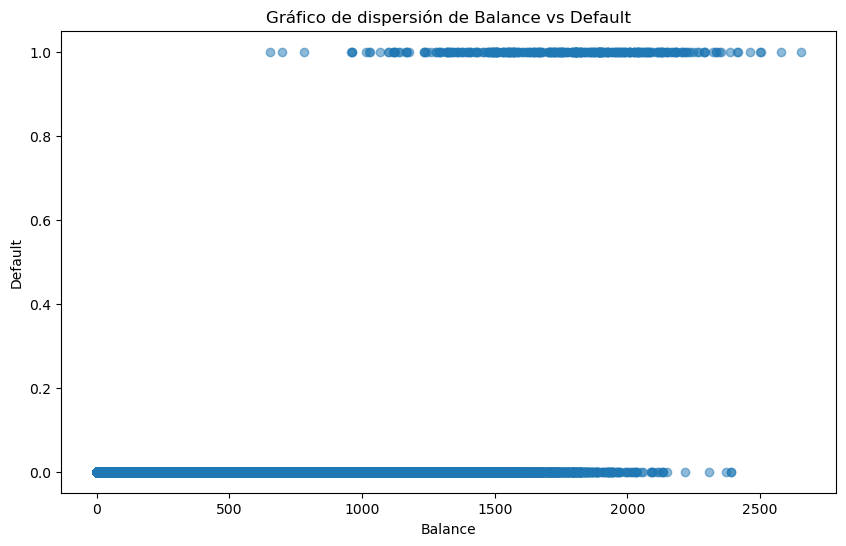

In [132]:
import matplotlib.pyplot as plt

x = obj["balance"]
y = (obj["default"] == "Yes")

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Balance')
plt.ylabel('Default')
plt.title('Gráfico de dispersión de Balance vs Default')
plt.show()


La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la función `minimize` del módulo `optimize` la librería `scipy` para estimar los parámetros del modelo. Utiliza $\beta_0=-10$ y $\beta_1=0.005$ como valores iniciales.

In [107]:
import numpy as np
import scipy.optimize as opt

def pr(beta, x):
    return 1 / (1 + np.exp(-(beta[0] + beta[1] * x)))

def J(beta, x, y):  # Beta y x es para las predicciones y y es la real para comparar
    epsilon = 1e-12
    y_pred = pr(beta, x)
    e = y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon)
    return -np.sum(e)

beta = [-10, 0.005]
resultado = opt.minimize(J, beta, args=(x, y))
resultado.x

array([-1.06510005e+01,  5.49871135e-03])

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [141]:
beta_r=resultado.x
predi=pr(beta_r,x)
predi

0       0.001306
1       0.002113
2       0.008596
3       0.000435
4       0.001777
          ...   
9995    0.001183
9996    0.001527
9997    0.002467
9998    0.116760
9999    0.000071
Name: balance, Length: 10000, dtype: float64

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [143]:
p1=predi*(1-predi)
p1

0       0.001304
1       0.002108
2       0.008522
3       0.000434
4       0.001774
          ...   
9995    0.001182
9996    0.001524
9997    0.002461
9998    0.103127
9999    0.000071
Name: balance, Length: 10000, dtype: float64

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [146]:
V = np.diagflat(p1)
V

array([[1.30420913e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.10847213e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.52178698e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.46081194e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03127401e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.14630237e-05]])

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [157]:
cov = np.linalg.inv(X.T @ V @ X)
cov

array([[ 1.30431238e-01, -7.81690641e-05],
       [-7.81690641e-05,  4.85617828e-08]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [163]:
se = np.sqrt(np.diag(cov))
se

array([3.61152651e-01, 2.20367382e-04])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [165]:
z = beta_r / se
z

array([-29.49168585,  24.95247398])

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [173]:
from scipy.stats import norm

p_value = 2 * (1 - norm.cdf(abs(z)))
p_value

array([0., 0.])

¿Es significativa la relación de los factores con la variable de respuesta?

Sí, son 0, el factor balance tiene una influencia significativa en la variable de respuesta default.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Utiliza `minimize` para estimar los coeficientes. Utiliza $\beta_0 = -3.5$ y $\beta_1 = 0.4$ como punto de partida.
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?

In [200]:
import numpy as np
import scipy.optimize as opt
from scipy.stats import norm

y1 = (obj["default"] == "Yes").astype(int)  # Transforma a 1 y 0
x1 = (obj["student"] == "Yes").astype(int)  

def pr(beta, x1):
    return 1 / (1 + np.exp(-(beta[0] + beta[1] * x1)))

def J(beta, x1, y1):  # Beta y x es para las predicciones y y es la real para comparar
    epsilon = 1e-12
    y_pred = pr(beta, x1)
    e = y1 * np.log(y_pred + epsilon) + (1 - y1) * np.log(1 - y_pred + epsilon)
    return -np.sum(e)

beta = [-3.5, 0.4]
resultado = opt.minimize(J, beta, args=(x1, y1))
beta_r=resultado.x

predi2 = pr(beta_r, x1)
p2 = predi2 * (1 - predi2)
X = np.column_stack((np.ones(len(x1)), x1))
V2 = np.diagflat(p2)
cov2 = np.linalg.inv(X.T @ V2 @ X)
se2 = np.sqrt(np.diag(cov2))
z2 = beta_r / se2
p_value2 = 2 * (1 - norm.cdf(abs(z2)))

beta_r

array([-3.50412773,  0.40488704])

In [202]:
predi2,p2,V2,cov2, se2, z2, p_value2

(0       0.029195
 1       0.043139
 2       0.029195
 3       0.029195
 4       0.029195
           ...   
 9995    0.029195
 9996    0.029195
 9997    0.029195
 9998    0.029195
 9999    0.043139
 Name: student, Length: 10000, dtype: float64,
 0       0.028343
 1       0.041278
 2       0.028343
 3       0.028343
 4       0.028343
           ...   
 9995    0.028343
 9996    0.028343
 9997    0.028343
 9998    0.028343
 9999    0.041278
 Name: student, Length: 10000, dtype: float64,
 array([[0.02834266, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.04127765, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.02834266, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.02834266, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.02834266,
         0.        ],
        [0.      

El valor p del segundo coeficiente (estudiante) es 0.00043, que es menor a 0,05. Esto indica que el factor "estudiante" es estadísticamente significativo para predecir el incumplimiento.

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `minimize` para estimar los coeficientes. Utiliza los siguientes valores como punto de partida:
   - $\beta_0 = -10$
   - $\beta_1 = 0.005$
   - $\beta_2 = 0.003$
   - $\beta_3 = -0.65$
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [209]:
import numpy as np
import scipy.optimize as opt

x_balance = obj["balance"].values.reshape(-1, 1)  
x_income = obj["income"].values.reshape(-1, 1) 
x_student = (obj["student"] == "Yes").values.reshape(-1, 1)  
y = (obj["default"] == "Yes").values  

def pr(beta, X):
    z = X @ beta
    return 1 / (1 + np.exp(-z))

def funcion_costo(beta, X, y):
    epsilon = 1e-10  
    y_pred = pr(beta, X)
    cost = -np.sum(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    return cost
    
X = np.hstack((np.ones((x_balance.shape[0], 1)), x_balance, x_income, x_student))


beta_inicial = np.array([-10, 0.005, 0.003, -0.65])

result = opt.minimize(funcion_costo, beta_inicial, args=(X, y))
result



C:\Users\terez\AppData\Local\Temp\ipykernel_11748\3680750405.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 7667.6083587034755
        x: [-1.000e+01 -9.913e-02 -1.002e+00 -6.501e-01]
      nit: 1
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[1 0 0 0]
            [0 1 0 0]
            [0 0 1 0]
            [0 0 0 1]]
     nfev: 10
     njev: 2

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

Una amenaza de bomba

Diagnostico de cáncer

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

Donde haya una fuga de gas

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3